# Mini Exercise

1. Load the titanic dataset that you've put together from previous lessons.
2. Split your data into training and test.
3. Fit a logistic regression model on your training data using sklearn's
   linear_model.LogisticRegression class. Use fare and pclass as the
   predictors.
4. Use the model's .predict method. What is the output?
5. Use the model's .predict_proba method. What is the output? Why do you
   think it is shaped like this?
6. Evaluate your model's predictions on the test data set. How accurate
   is the mode? How does changing the threshold affect this?

In [1]:
import prepare
import acquire
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import split_scale

# Acquire the data

In [2]:
titanic = acquire.get_titanic_data()

# Prep the data

In [3]:
train_scaled, test_scaled = prepare.prep_titanic(titanic)

In [4]:
logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')

In [5]:
X_train = train_scaled[["fare", "pclass"]]
y_train = train_scaled[["survived"]]
X_test = test_scaled[["fare", "pclass"]]
y_test = test_scaled[["survived"]]

# Fit the data into the model

In [6]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
logit.predict(X_train)

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

The output here is the actual prediction it seems, on whether or not the individual is being classified likely survived or not. 

In [8]:
logit.predict_proba(X_train)

array([[0.22610689, 0.77389311],
       [0.58623763, 0.41376237],
       [0.5866741 , 0.4133259 ],
       ...,
       [0.58609211, 0.41390789],
       [0.58665331, 0.41334669],
       [0.58623763, 0.41376237]])

The output here is the probability of whether a person survived or not, and then based on a threshold of .5, it then classifies those values as a 1 or a 0. The reason why it is a two column array its becasue it is showing the probability of both predictors (fare and pclass). This means that it looks at both probabilities first independently, and then comes up with an aggregate value to predict classification.

# Evaluate

In [9]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.66


In [10]:
decisions = (logit.predict_proba(X_train) >= .3).astype(int)

# Test

In [11]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.70


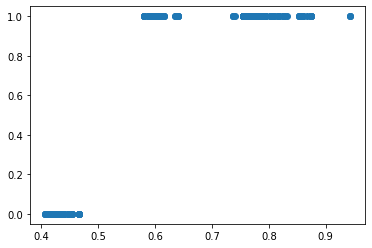

In [12]:
y_pred_proba = [i[1] for i in logit.predict_proba(X_train)]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, logit.predict(X_train))

# Model Exercises

In this exercise, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

In [13]:
train_scaled, test_scaled = prepare.prep_titanic(titanic)

In [14]:
encoder = OneHotEncoder()
encoder.fit(train_scaled[["sex"]])
m = encoder.transform(train_scaled[["sex"]]).todense() 
train_scaled = pd.concat([train_scaled, pd.DataFrame(m, columns=encoder.categories_[0], index=train_scaled.index)], axis = 1)
                      
m = encoder.transform(test_scaled[["sex"]]).todense()
test_scaled = pd.concat([test_scaled, pd.DataFrame(m, columns=encoder.categories_[0], index=test_scaled.index)], axis = 1)


In [15]:
train_scaled, validate = train_test_split(train_scaled, random_state=123, train_size = .83)

## 1. Create another model that includes age in addition to fare and pclass. Does this model perform better than your previous one?

In [16]:
logit = LogisticRegression()

In [17]:
X_train_1 = train_scaled[["fare", "pclass", "age"]]
y_train_1 = train_scaled[["survived"]]
X_test_1 = validate[["fare", "pclass", "age"]]
y_test_1 = validate[["survived"]]

In [18]:
logit.fit(X_train_1, y_train_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train_1, y_train_1)))

Accuracy of Logistic Regression classifier on training set: 0.71


This model performs better than the model that only uses class and fare

In [20]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test_1, y_test_1)))

Accuracy of Logistic Regression classifier on test set: 0.66


In [21]:
def evaluate_thresholds(y, probs):
    return pd.DataFrame(
        [evaluate_thresholds(t, y, probs) for t in np.arange(0, 1.01, 0.01)]
    )


def plot_metrics_by_thresholds(y, probs, subplots=False):
    evaluation = evaluate_thresholds(y, probs)
    axs = (
        evaluation.query("precision > 0")
        .set_index("threshold")
        .plot(subplots=subplots, sharex=True, sharey=True, figsize=(12, 8.5))
    )
    (axs[-1] if subplots else axs).set_xticks(np.arange(0, 1.05, 0.05))
    plt.tight_layout()

In [22]:
# plot_metrics_by_thresholds(y_train_1, logit.predict_proba(X_train_1))

## 2. Include sex in your model as well. Note that you'll need to encode this feature before including it in a model.

In [23]:
logit = LogisticRegression()

In [24]:
train_scaled

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,C,Q,S,female,male
119,119,0,3,female,0.019455,4,2,0.126353,Third,Southampton,0,0.0,0.0,1.0,1.0,0.0
63,63,0,3,male,0.050584,3,2,0.112718,Third,Southampton,0,0.0,0.0,1.0,0.0,1.0
625,625,0,1,male,0.937743,0,0,0.130578,First,Southampton,1,0.0,0.0,1.0,0.0,1.0
357,357,0,2,female,0.579767,0,0,0.052521,Second,Southampton,1,0.0,0.0,1.0,1.0,0.0
202,202,0,3,male,0.517510,0,0,0.026243,Third,Southampton,1,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,653,1,3,female,0.452652,0,0,0.031630,Third,Queenstown,1,0.0,1.0,0.0,1.0,0.0
20,20,0,2,male,0.533074,0,0,0.105042,Second,Southampton,1,0.0,0.0,1.0,0.0,1.0
589,589,0,3,male,0.452652,0,0,0.032523,Third,Southampton,1,0.0,0.0,1.0,0.0,1.0
514,514,0,3,male,0.361868,0,0,0.030284,Third,Southampton,1,0.0,0.0,1.0,0.0,1.0


In [25]:
X_train_2 = train_scaled[["fare", "pclass", "age", "female", "male"]]
y_train_2 = train_scaled[["survived"]]
X_test_2= validate[["fare", "pclass", "age", "female", "male"]]
y_test_2= validate[["survived"]]

In [26]:
logit.fit(X_train_2, y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
logit.score(X_train_2, y_train_2)

0.7762711864406779

In [28]:
logit.score(X_test_2, y_test_2)

0.819672131147541

## 3. Try out other combinations of features and models.

In [29]:
logit = LogisticRegression()

In [30]:
X_train_3 = train_scaled[["fare", "pclass", "age", "sibsp"]]
y_train_3 = train_scaled[["survived"]]
X_test_3= validate[["fare", "pclass", "age", "sibsp"]]
y_test_3= validate[["survived"]]

In [31]:
logit.fit(X_train_3, y_train_3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
logit.score(X_train_3, y_train_3)

0.7016949152542373

In [33]:
logit.score(X_test_3, y_test_3)

0.6557377049180327

## 4. Choose you best model and evaluate it on the test dataset. Is it overfit?

In [34]:
logit = LogisticRegression()

X_train_2 = train_scaled[["fare", "pclass", "age", "female", "male"]]
y_train_2 = train_scaled[["survived"]]
X_test_2= test_scaled[["fare", "pclass", "age", "female", "male"]]
y_test_2= test_scaled[["survived"]]

In [35]:
logit.fit(X_train_2, y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
logit.score(X_train_2, y_train_2)

0.7762711864406779

In [37]:
logit.score(X_test_2, y_test_2)

0.7932960893854749

Given that the test with sex was our best performing model, we use it to compare it against our test data. In this case, we can see the model is not overfit, as the difference in accuracy between both is fairly small. 

## 5. Bonus How do different strategies for handling the missing values in the age column affect model performance?

In [38]:
titanic = acquire.get_titanic_data()

In [39]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [40]:
titanic.age.isnull().value_counts()

False    714
True     177
Name: age, dtype: int64

In [41]:
train, test = train_test_split(titanic, random_state = 123, train_size = .8)

In [42]:
train.age.isnull().value_counts()

False    564
True     148
Name: age, dtype: int64

In [43]:
group_avg_lookup = train.groupby(["pclass"]).age.agg("mean")

In [44]:
train["age"] = train["age"].fillna(train["pclass"].map(group_avg_lookup))
test["age"] = test["age"].fillna(test["pclass"].map(group_avg_lookup))

In [45]:
train.age.isnull().value_counts()

False    712
Name: age, dtype: int64

In [46]:
train, validate = train_test_split(train, random_state =123, train_size= .8)

In [47]:
logit = LogisticRegression()

X_train_4 = train[["fare", "pclass", "age"]]
y_train_4 = train[["survived"]]
X_test_4= validate[["fare", "pclass", "age"]]
y_test_4= validate[["survived"]]

In [48]:
logit.fit(X_train_4, y_train_4)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
logit.score(X_train_4, y_train_4)

0.7012302284710018

In [50]:
logit.score(X_test_4, y_test_4)

0.6643356643356644

Without scaling the data, it seems the model actually performs about the same.

In [51]:
age_scale_train = train[["age", "fare"]]
age_scale_test = test[["age", "fare"]]

In [52]:
_, train_scaled, test_scaled = split_scale.min_max_scaler(age_scale_train, age_scale_test)

In [53]:
train["age"] = train_scaled["age"]
test["age"] = test_scaled["age"]
train["fare"] = train_scaled["fare"]
test["fare"] = test_scaled["fare"]

In [54]:
logit = LogisticRegression()

X_train_5 = train[["fare", "pclass", "age"]]
y_train_5 = train[["survived"]]
X_test_5 = test[["fare", "pclass", "age"]]
y_test_5 = test[["survived"]]

In [55]:
logit.fit(X_train_5, y_train_5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
logit.score(X_train_5, y_train_5)

0.7117750439367311

In [57]:
logit.score(X_test_5, y_test_5)

0.7318435754189944

Even once the data is scaled, is seems to perform very similarly.

In [58]:
logit.coef_

array([[ 0.93217565, -0.83832614, -1.68659627]])

By looking at the coefficients, we can see that they are all fairly similar, but age is definitively the most powerful indicator of suvivability at this point, and the higher the age, the lower the probability of survival.

## 6. Bonus: How do different strategies for encoding sex affect model performance?

In [59]:
from sklearn import preprocessing
import sklearn

In [60]:
titanic = acquire.get_titanic_data()

In [61]:
train, test = train_test_split(titanic, random_state = 123, train_size = .8)

In [62]:
test.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
172,172,1,3,female,1.0,1,1,11.1333,S,Third,None,Southampton,0
524,524,0,3,male,NaN,0,0,7.2292,C,Third,None,Cherbourg,1
452,452,0,1,male,30.0,0,0,27.7500,C,First,C,Cherbourg,1
170,170,0,1,male,61.0,0,0,33.5000,S,First,B,Southampton,1
620,620,0,3,male,27.0,1,0,14.4542,C,Third,None,Cherbourg,0


In [63]:
imputer = sklearn.impute.SimpleImputer(strategy = "mean")
imputer.fit(train[["age"]])
train.age = imputer.transform(train[["age"]])
test.age = imputer.transform(test[["age"]])

In [64]:
le = preprocessing.LabelEncoder()
train["sex"] = le.fit_transform(train.sex)
test["sex"] = le.transform(test.sex)

In [65]:
train, validate = train_test_split(train, random_state = 123, train_size = .8)

In [66]:
logit = LogisticRegression()

train_scaled

X_train_7 = train[["fare", "pclass", "age", "sex"]]
y_train_7 = train[["survived"]]
X_test_7= validate[["fare", "pclass", "age", "sex"]]
y_test_7= validate[["survived"]]

logit.fit(X_train_7, y_train_7)

logit.score(X_train_7, y_train_7)

0.7768014059753954

In [67]:
logit.score(X_test_7, y_test_7)

0.8111888111888111

In [68]:
logit.coef_

array([[ 0.00275126, -0.81985162, -0.01731668, -2.24534559]])

Using a simple label encoder seemed to work the same as using a hot label encoder. The suprising part is that before, age was the most influencial coefficient, but once it is paired with sex, it seems that it becomes less relevant.

## 7. scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.

Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.

In [69]:
C = .01
c = 10
X_train = train[["fare", "pclass", "sex"]]
y_train = train[["survived"]]
X_test = validate[["fare", "pclass", "sex"]]
y_test = validate[["survived"]]
accuracy_score = []


for x in range(0,6):

    
    
    logit = LogisticRegression(C=C)

    logit.fit(X_train, y_train)

    score = logit.score(X_train, y_train)
    
    accuracy_score.append(score)
    
    C *= c

c = .001
for i in range(1, 7):
    print(f" When C = {c * (10**i)}, then the accuracy score is {accuracy_score[i - 1]:.2f}")

 When C = 0.01, then the accuracy score is 0.70
 When C = 0.1, then the accuracy score is 0.77
 When C = 1.0, then the accuracy score is 0.77
 When C = 10.0, then the accuracy score is 0.78
 When C = 100.0, then the accuracy score is 0.78
 When C = 1000.0, then the accuracy score is 0.78


In [70]:
logit = LogisticRegression(C=.01)

logit.fit(X_train, y_train)
coefficients = logit.coef_

logit = LogisticRegression(C=1000)

logit.fit(X_train, y_train)
coefficients_2 = logit.coef_

print(coefficients)
print(coefficients_2)

[[ 0.01008302 -0.21533558 -0.47912208]]
[[ 7.47879367e-04 -9.40769809e-01 -2.57282771e+00]]


## Decision Tree Exercises

## 1. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [71]:
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Acquire and Prep

In [72]:
titanic = acquire.get_titanic_data()

In [73]:
titanic.age = titanic.age.fillna(titanic.age.mean())
titanic.age = titanic.age.astype(int)

In [74]:
def encode_sex(df):
    '''
    Returns a new dataframe with the ``sex`` column encoded.
    '''
    return df.assign(
        sex=(df.sex == 'female').astype(int)
    )

In [75]:
titanic = encode_sex(titanic)

In [76]:
train, test = train_test_split(titanic, random_state = 123, train_size=.8)
train, validate = train_test_split(train, random_state = 123, train_size = .8)

In [77]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
535,535,1,2,1,7,0,2,26.2500,S,Second,None,Southampton,0
573,573,1,3,1,29,0,0,7.7500,Q,Third,None,Queenstown,1
736,736,0,3,1,48,1,3,34.3750,S,Third,None,Southampton,0
713,713,0,3,0,29,0,0,9.4833,S,Third,None,Southampton,1
528,528,0,3,0,39,0,0,7.9250,S,Third,None,Southampton,1


In [78]:
X_train = train[['pclass', 'sex', 'age', "fare"]]
y_train = train["survived"]
X_validate = validate[['pclass', 'sex', 'age', "fare"]]
y_validate = validate["survived"]
X_test = test[['pclass', 'sex', 'age', "fare"]]
y_test = test["survived"]

In [79]:
y_train.head()

535    1
573    1
736    0
713    0
528    0
Name: survived, dtype: int64

## Modeling

In [80]:
evaluation = pd.DataFrame({"actual": y_train})

In [81]:
# Create the thing

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

# Fit the the thing
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [82]:
# Estimate survival

y_pred = clf.predict(X_train)
evaluation["survived ~ pclass + sex + age"] = clf.predict(X_train)

In [83]:
# Estimate the probability of a survival


y_pred_proba = clf.predict_proba(X_train)

##  Evaluate

In [84]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [85]:
labels = sorted(titanic.survived.unique())

pd.DataFrame(confusion_matrix(evaluation.actual, evaluation.iloc[:,1]), index = labels, columns = labels)

,0,1
0,302,43
1,72,152


In [86]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       345
           1       0.78      0.68      0.73       224

    accuracy                           0.80       569
   macro avg       0.79      0.78      0.78       569
weighted avg       0.80      0.80      0.79       569



In [87]:
# import graphviz

# from graphviz import Graph

# dot_data = export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 

# graph.render('iris_decision_tree', view=True)

## Test

In [88]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.80


## Run through steps 2-4 using entropy as your measure of impurity.

In [89]:
# Create the thing

clf_impurity = DecisionTreeClassifier(criterion= "gini", max_depth=3, random_state=123)

# Fit the thing
clf_impurity.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [90]:
y_pred = clf_impurity.predict(X_train)
evaluation["survived ~ pclass + sex + age (gini)"] = clf_impurity.predict(X_train)

In [91]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_impurity.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.81


In [92]:
labels = sorted(titanic.survived.unique())

pd.DataFrame(confusion_matrix(evaluation.actual, evaluation.iloc[:,2]), index = labels, columns = labels)

,0,1
0,296,49
1,58,166


In [93]:
for i in range(0,2):
    print(f"Model {evaluation.columns[i + 1]}")
    print(classification_report(evaluation.actual, evaluation.iloc[:,(i + 1)]))
    print("-------------")

Model survived ~ pclass + sex + age
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       345
           1       0.78      0.68      0.73       224

    accuracy                           0.80       569
   macro avg       0.79      0.78      0.78       569
weighted avg       0.80      0.80      0.79       569

-------------
Model survived ~ pclass + sex + age (gini)
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       345
           1       0.77      0.74      0.76       224

    accuracy                           0.81       569
   macro avg       0.80      0.80      0.80       569
weighted avg       0.81      0.81      0.81       569

-------------


## Test

In [94]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_impurity.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.80


So we conclude that it is a pretty good model - with an accuracy of around 80%. The data is not overfitted, as the test performed relatively well. Additionally, we find that the impurity choice in this case does not have an effect on accuracy, or any of the other evaluation methods. 

In [95]:
# import graphviz

# from graphviz import Graph

# dot_data = export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 

# graph.render('titanic_decision_tree', view=True)

# Bonus: Predict if someone is a smoker or not using the tips data

In [96]:
from pydataset import data

In [97]:
tips = data("tips")

In [98]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [99]:
tips = tips.assign(sex=(tips.sex == 'Female').astype(int))

Explore

In [100]:
tips["tip_rate"] = tips["tip"] / tips["total_bill"]

In [101]:
tips.groupby("smoker")[["tip","total_bill", "tip_rate"]].agg(["mean", "count"])

tip       total_bill        tip_rate      
            mean count       mean count      mean count
smoker                                                 
No      2.991854   151  19.188278   151  0.159328   151
Yes     3.008710    93  20.756344    93  0.163196    93

In [102]:
tips.groupby(["smoker", "time"]).tip.mean()

smoker  time  
No      Dinner    3.126887
        Lunch     2.673778
Yes     Dinner    3.066000
        Lunch     2.834348
Name: tip, dtype: float64

In [103]:
import seaborn as sns

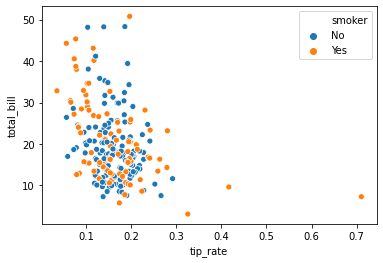

In [104]:
sns.scatterplot(x="tip_rate", y = "total_bill", data=tips, hue="smoker")

Split the data

In [105]:
train, test = train_test_split(tips, random_state = 123, train_size=.8)
train, validate = train_test_split(train, random_state = 123, train_size = .8)

In [106]:
features = ["total_bill", "tip", "sex", "size"]
target = "smoker"


X_train = train[features]
y_train = train[target]
X_validate = validate[features]
y_validate = validate[target]
X_test = test[features]
y_test = test[target]

Model

In [107]:
# Create the thing

clf_tips = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the thing
clf_tips.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

Evaluate

In [108]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_tips.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.76


In [109]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, clf_tips.predict(X_train)), index=labels, columns=labels)

,No,Yes
No,95,4
Yes,36,21


In [110]:
print(classification_report(y_train, clf_tips.predict(X_train)))

              precision    recall  f1-score   support

          No       0.73      0.96      0.83        99
         Yes       0.84      0.37      0.51        57

    accuracy                           0.74       156
   macro avg       0.78      0.66      0.67       156
weighted avg       0.77      0.74      0.71       156



What if we scale the data - does that have an impact on the outcome? 

In [111]:
scaler, train_scaled, test_scaled = split_scale.min_max_scaler(X_train, X_test)

In [112]:
clf_tips_scaled = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the thing
clf_tips_scaled.fit(train_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [113]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_tips.score(train_scaled, y_train)))

Accuracy of Decision Tree classifier on training set: 0.63
